<a href="https://colab.research.google.com/github/Sagar-b27/Learning_projects/blob/main/Text_classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, None, 16)          1360000   
                                                                 
 global_average_pooling1d_7   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_14 (Dense)            (None, 16)                272       
                                                                 
 dense_15 (Dense)            (None, 1)                 17        
                                                                 
Total params: 1,360,289
Trainable params: 1,360,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
30/30 [==============================] - 1s 28ms/step - loss: 0.6922 - accuracy: 0.5889 - val_loss:

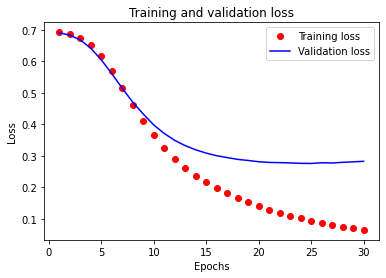

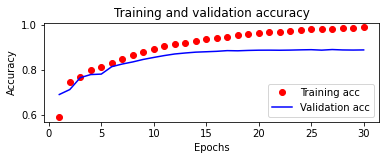

In [10]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


data = keras.datasets.imdb

# num_words decide the size of our vocabulary, it shrinks the data by removing less frequent words

(train_data, train_labels), (test_data, test_labels) = data.load_data(num_words = 85000)

# Returns a dictionary with words and indexes associated with it
word_index = data.get_word_index()

# (v+3) is because we will have 3 special keys for our word mapping
word_index = {k:(v+3) for k,v in word_index.items()}

#Used to add padding at the end of string of words to equalize the length while comparing
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNKNOWN>"] = 2
word_index["<UNUSED>"] = 3

# reversing the (key,value) pairs
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

#Preprocessing data to pass a constant size input into the network
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value = word_index["<PAD>"], padding="post", maxlen=250)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value = word_index["<PAD>"], padding="post", maxlen=250)


# Decoding int values into words 
def decode_review(text):
  return " ".join([reverse_word_index.get(i, "?") for i in text])

#model
#Embedding layer finds correlation between different inputs and groups them
#GlobalAveragePooling1D squishes the 16 dimension output data into smaller dimension
#This data is then passed into dense layer to find patterns and return the output between 0 and 1

model = keras.Sequential()
model.add(keras.layers.Embedding(85000, 16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation="relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

model.summary()

model.compile(optimizer="adam", loss="BinaryCrossentropy", metrics=["accuracy"])

#Validation set is created to make sure that the network is doing computation on data it has not seen yet.

x_val = train_data[:10000]
x_train = train_data[10000:]

y_val = train_labels[:10000]
y_train = train_labels[10000:]

model_fit = model.fit(x_train, y_train, epochs = 30, batch_size = 512, validation_data=(x_val,y_val), verbose = 1)

results = model.evaluate(test_data, test_labels)

print(results)

model_dict = model_fit.history
acc = model_dict["accuracy"]
val_acc = model_dict["val_accuracy"]
loss = model_dict["loss"]
val_loss = model_dict["val_loss"]

epochs = range(1, len(acc)+1)

plt.plot(epochs, loss,"ro", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.subplot(211)
plt.plot(epochs, acc, "ro", label= "Training acc")
plt.plot(epochs, val_acc, "b", label = "Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()



#To save the model:
#model.save("name.h5")

#Accessing the model:
#model = keras.models.load_model("name.h5")

#==========================================

#Comparing the prediction with test labels

#test_review = test_data[0]
#predict = model.predict(np.array([test_review]))
#print("Review: ")
#print(decode_review(test_review))
#print("Prediction: " + str(predict[0]))
#print("Actual: "+ str(test_labels[0]))

